In [1]:
#Useful imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, asin, acos, atan
%reload_ext autoreload
%autoreload 2
plt.style.use('latex.mplstyle')

## Load and visualize data

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


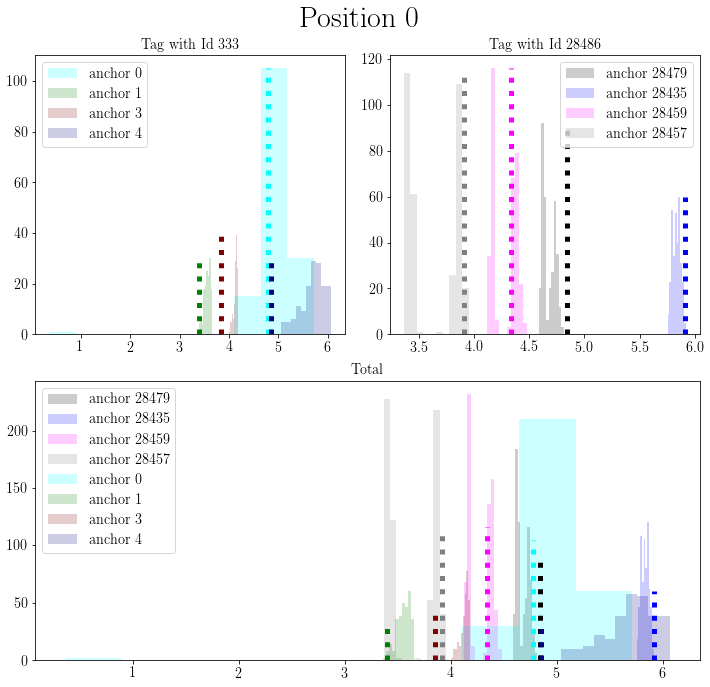

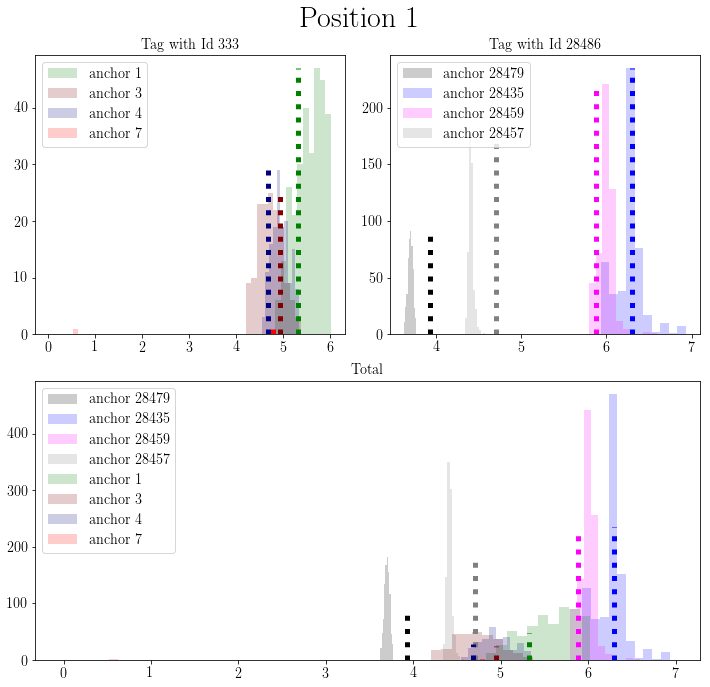

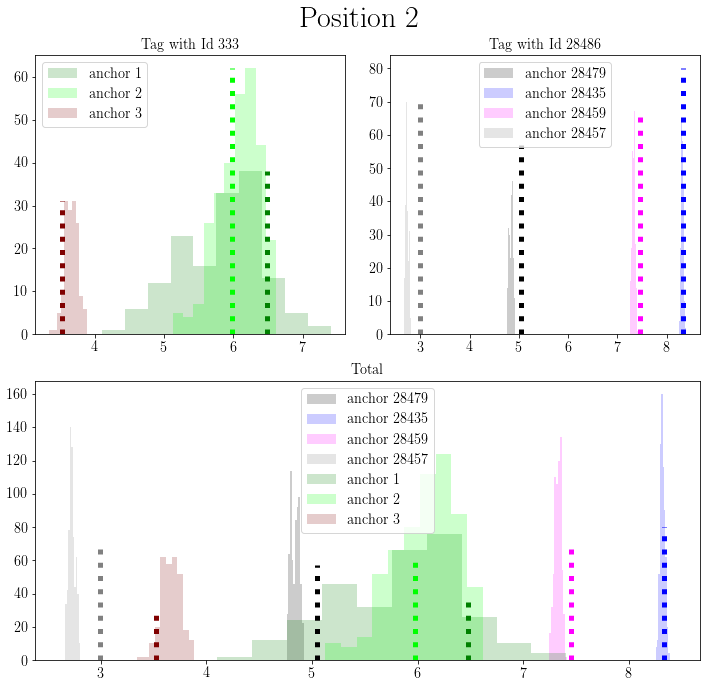

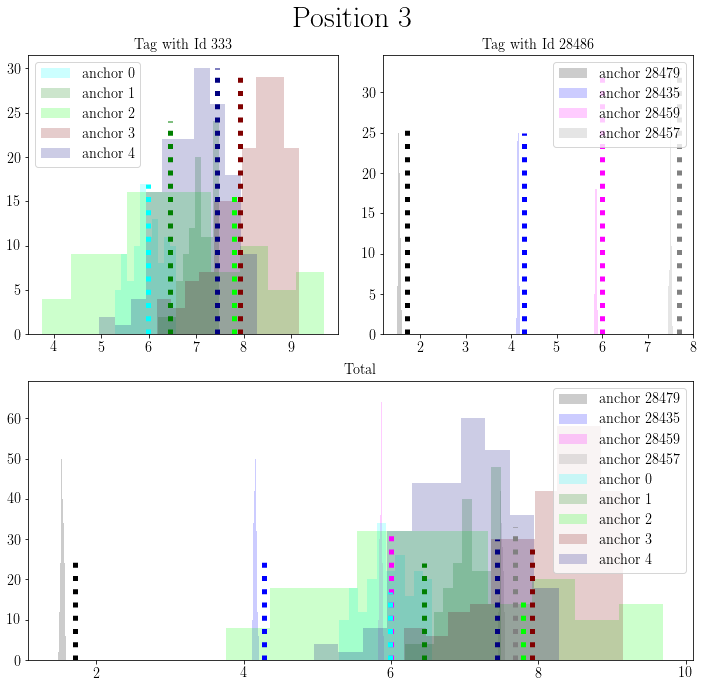

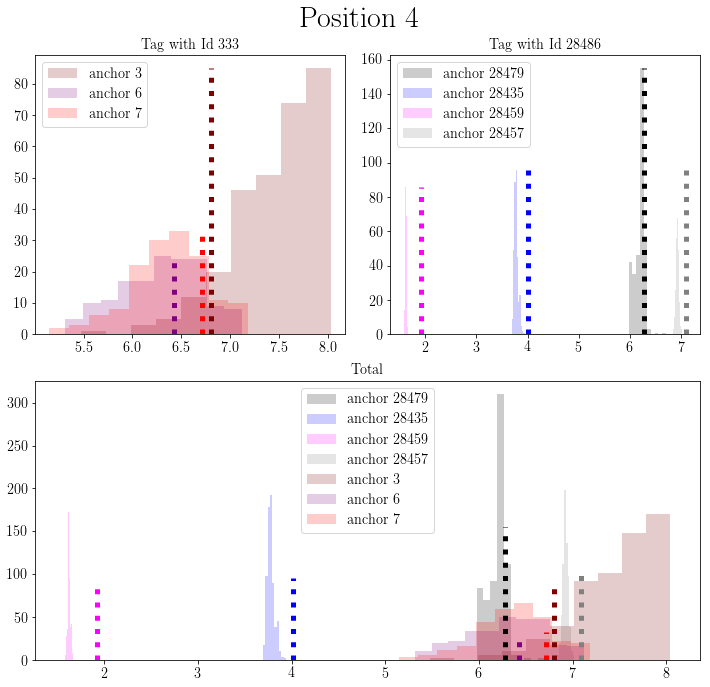

In [93]:
import plots_cti as plots
from experiments import read_experimental_data,N_POSITIONS

#tool = 'Pozyx'
tool = 'Ubiment'
#tool = 'Beacon'

april_tag_id = 333
pozyx_tag_id = 28486
beacon_tag_id = 444

if tool == 'Pozyx':
    path = 'data/Pozyx/Static/'
    name = 'pozyx_data_P{}.csv'
    runs = [0]
    tag_ids = [pozyx_tag_id]
    weighted = False
elif tool == 'Ubiment':
    path = 'data/Ubiment/Static/'
    name = 'data_P{}_{}.csv'
    runs = [1,2]
    tag_ids = [april_tag_id, pozyx_tag_id]
    weighted = True
elif tool == 'Beacon':
    path = 'data/Beacon/Static/'
    name = 'beacon_data_P{}.csv'
    runs = [1]
    tag_ids = [beacon_tag_id]
    weighted = False
    tool = 'Pozyx'


results, anchors = read_experimental_data(path, name, runs, tag_ids, weighted)

## Compare weights (Ubiment only)

/opt/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3126: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


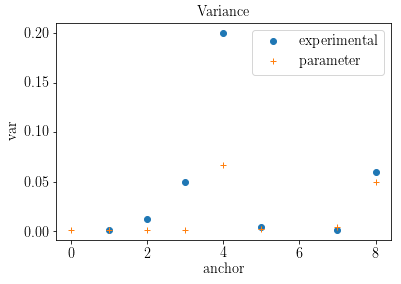

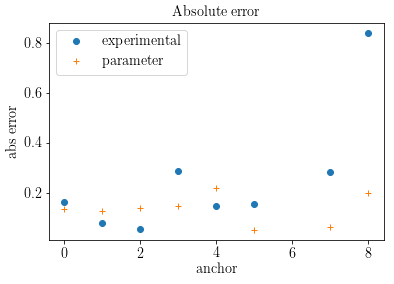

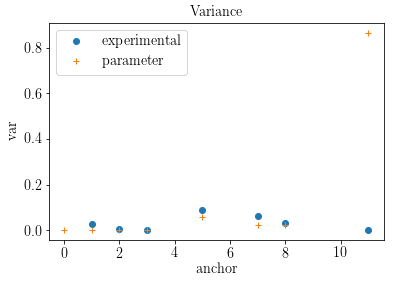

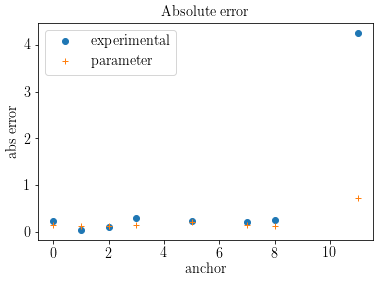

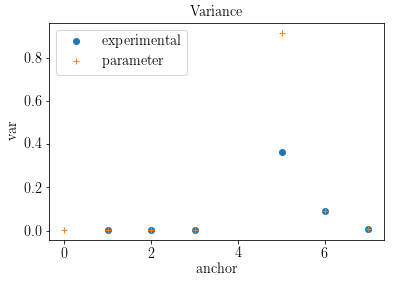

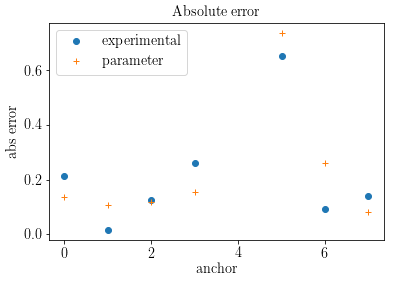

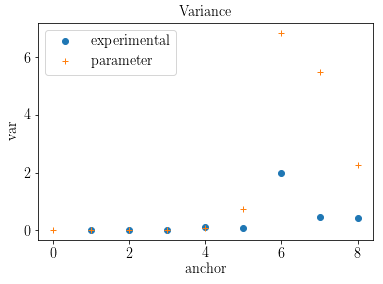

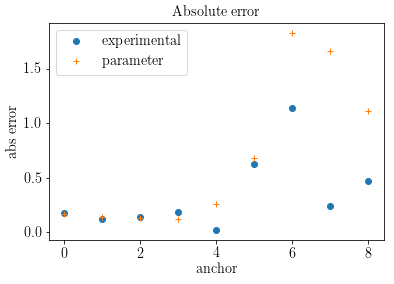

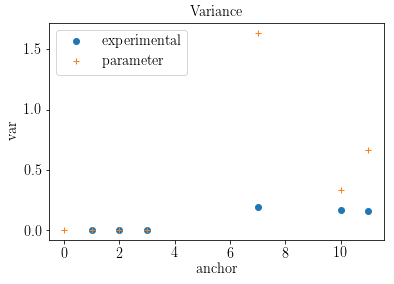

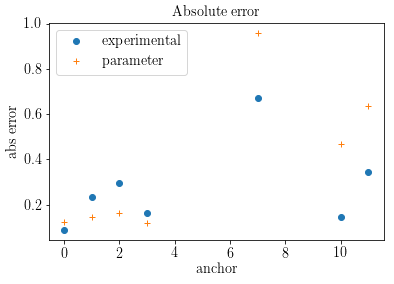

In [94]:
from point_configuration import HeterogenousConfiguration, PointConfiguration, dm_from_edm, create_from_points, edm_from_dm
from plots_cti import plot_matrix
index = -1
for result in results:
    var_exp = [np.var(d) for d in result.distances]
    var_exp[var_exp==0] = np.nan
    var = np.delete(result.var_avg[index,:],index)
    var[var==0] = np.nan
    plt.plot(var_exp, 'o', label='experimental')
    plt.plot(var, '+', label='parameter')
    plt.title('Variance')
    plt.xlabel('anchor')
    plt.ylabel('var')
    plt.legend(loc='best')
    plt.show()
    
    real_points = np.r_[anchors,result.real.reshape((1,-1))]
    porig = create_from_points(real_points, HeterogenousConfiguration)
    abs_error_exp = np.abs(np.sqrt(result.edm_avg[index,:]) - np.sqrt(porig.edm[index,:]))
    abs_error_exp[result.edm_avg[index,:]==0] = np.nan
    abs_error = np.delete(result.abs_error_avg[index,:],index)
    abs_error[abs_error==0] = np.nan
    
    plt.plot(abs_error_exp, 'o', label='experimental')
    plt.plot(abs_error, '+', label='parameter')
    plt.title('Absolute error')
    plt.xlabel('anchor')
    plt.ylabel('abs error')
    plt.legend(loc='best')
    plt.show()

In [95]:
def get_weights(weight_method):
    from basics import divide_where_nonzero
    if weight_method == 'LOESS':
        max_dik = np.max(pnoisy.edm,axis=1)**(0.5)
        max_dkj = np.max(pnoisy.edm,axis=0)**(0.5)
        weights_matrix = np.ones((N,N))
        for i in range(N):
            for j in range(N):
                hij = max(max_dik[i],max_dkj[j])
                weights_matrix[i,j] = np.exp(-pnoisy.edm[i,j]/hij**2)
    else:
        if weight_method == 'bias':
            if tool == 'Pozyx':
                # experimental bias 
                bias = np.sqrt(np.abs(porig.edm[index,other] - pnoisy.edm[index,other]))
            else:
                # parametric bias
                bias = result.abs_error_avg[index, other]
            
            weights = divide_where_nonzero(np.ones(bias.shape),bias)
        elif weight_method == 'sigma':
            if tool == 'Pozyx':
                # experimental sigma
                from basics import divide_where_nonzero
                sigma2 = np.array([np.var(d) for d in result.distances])
                sigma2[np.isnan(sigma2)] = 0
            
            else:
                # parametric sigma
                sigma2 = result.var_avg[index,other]
            weights = divide_where_nonzero(np.ones(sigma2.shape),sigma2)
        else:
            print('unknown weighting method')
        weights_matrix = np.ones((N,N))*max(weights)
        weights_matrix[index,other] = weights
        weights_matrix[other,index] = weights
    # set weights to zero where measurements are missing
    weights_matrix[pnoisy.edm == 0] = 0.0
    return weights_matrix

## Apply algorithms

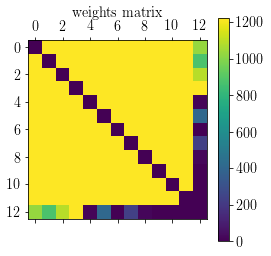

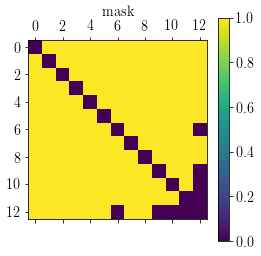

estimate using mds...
...done
estimate using weighted mds...
i 0
i 1
weighted mds: coordinate converged after 6 loops.
i 2
weighted mds: coordinate converged after 4 loops.
i 3
i 4
i 5
weighted mds: coordinate converged after 9 loops.
i 6
weighted mds: coordinate converged after 5 loops.
i 7
weighted mds: coordinate converged after 6 loops.
i 8
weighted mds: coordinate converged after 9 loops.
i 9
weighted mds: coordinate converged after 5 loops.
i 10
weighted mds: coordinate converged after 9 loops.
i 11
i 12
weighted mds: not yet converged: [ 10.   6.   4.  10.  10.   9.   5.   6.   9.   5.   9.  10.  10.]
i 0
i 1
weighted mds: coordinate converged after 9 loops.
i 2
i 3
i 4
weighted mds: coordinate converged after 4 loops.
i 5
i 6
i 7
weighted mds: coordinate converged after 10 loops.
i 8
i 9
weighted mds: coordinate converged after 7 loops.
i 10
weighted mds: coordinate converged after 8 loops.
i 11
i 12
weighted mds: not yet converged: [ 10.   9.   4.  10.   4.   9.   5.  10.   9.

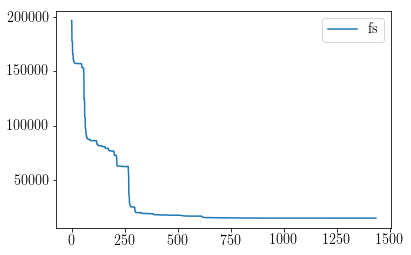

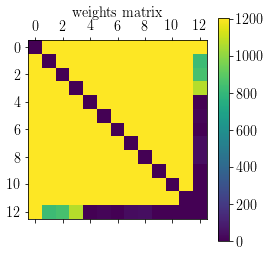

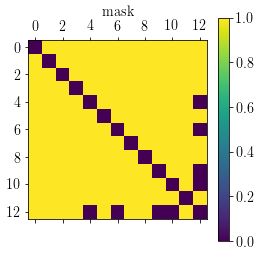

estimate using mds...
...done
estimate using weighted mds...
i 0
i 1
weighted mds: coordinate converged after 8 loops.
i 2
weighted mds: coordinate converged after 5 loops.
i 3
i 4
weighted mds: coordinate converged after 8 loops.
i 5
weighted mds: coordinate converged after 5 loops.
i 6
i 7
i 8
i 9
weighted mds: coordinate converged after 7 loops.
i 10
weighted mds: coordinate converged after 10 loops.
i 11
i 12
weighted mds: coordinate converged after 7 loops.
weighted mds: not yet converged: [ 10.   8.   5.  10.   8.   5.  10.  10.  10.   7.  10.  10.   7.]
i 0
weighted mds: coordinate converged after 7 loops.
i 1
i 2
weighted mds: coordinate converged after 10 loops.
i 3
weighted mds: coordinate converged after 10 loops.
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
weighted mds: coordinate converged after 5 loops.
weighted mds: not yet converged: [  7.   8.  10.  10.   8.   5.  10.  10.  10.   7.  10.  10.   5.]
i 0
i 1
weighted mds: coordinate converged after 7 loops.
i 2
weighted mds: 

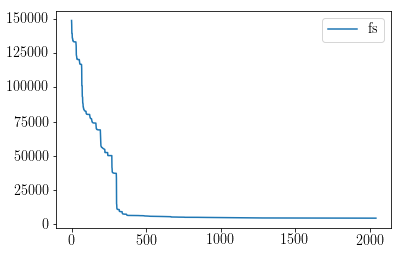

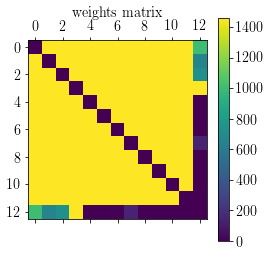

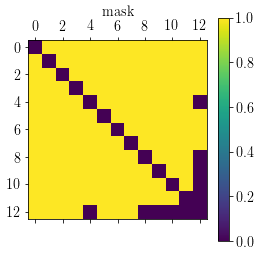

estimate using mds...
...done
estimate using weighted mds...
i 0
i 1
i 2
i 3
i 4
weighted mds: coordinate converged after 5 loops.
i 5
i 6
i 7
weighted mds: coordinate converged after 7 loops.
i 8
i 9
weighted mds: coordinate converged after 9 loops.
i 10
i 11
i 12
weighted mds: not yet converged: [ 10.  10.  10.  10.   5.  10.  10.   7.  10.   9.  10.  10.  10.]
i 0
weighted mds: coordinate converged after 3 loops.
i 1
weighted mds: coordinate converged after 5 loops.
i 2
i 3
i 4
i 5
i 6
i 7
weighted mds: coordinate converged after 4 loops.
i 8
i 9
weighted mds: coordinate converged after 7 loops.
i 10
weighted mds: coordinate converged after 6 loops.
i 11
i 12
weighted mds: not yet converged: [  3.   5.  10.  10.   5.  10.  10.   4.  10.   7.   6.  10.  10.]
i 0
weighted mds: coordinate converged after 2 loops.
i 1
i 2
i 3
i 4
i 5
weighted mds: coordinate converged after 2 loops.
i 6
i 7
weighted mds: coordinate converged after 2 loops.
i 8
i 9
weighted mds: coordinate converged afte

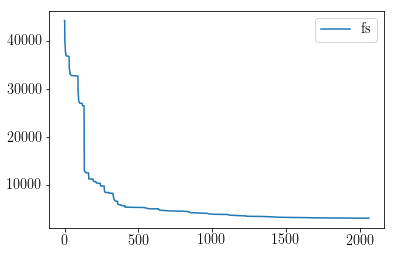

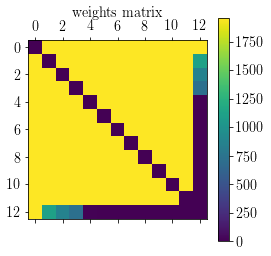

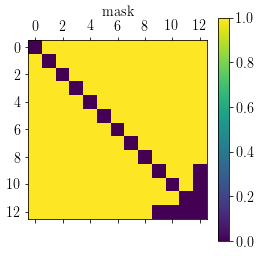

estimate using mds...
...done
estimate using weighted mds...
i 0
weighted mds: coordinate converged after 7 loops.
i 1
i 2
i 3
weighted mds: coordinate converged after 6 loops.
i 4
i 5
weighted mds: coordinate converged after 5 loops.
i 6
weighted mds: coordinate converged after 10 loops.
i 7
weighted mds: coordinate converged after 6 loops.
i 8
i 9
weighted mds: coordinate converged after 4 loops.
i 10
weighted mds: coordinate converged after 7 loops.
i 11
weighted mds: coordinate converged after 9 loops.
i 12
weighted mds: coordinate converged after 9 loops.
weighted mds: not yet converged: [  7.  10.  10.   6.  10.   5.  10.   6.  10.   4.   7.   9.   9.]
i 0
weighted mds: coordinate converged after 4 loops.
i 1
weighted mds: coordinate converged after 9 loops.
i 2
weighted mds: coordinate converged after 3 loops.
i 3
weighted mds: coordinate converged after 4 loops.
i 4
weighted mds: coordinate converged after 4 loops.
i 5
weighted mds: coordinate converged after 3 loops.
i 6
weigh

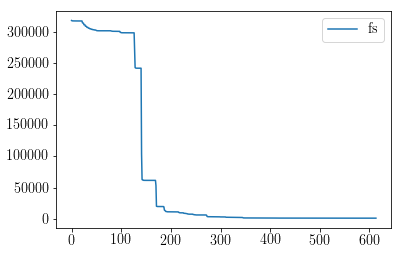

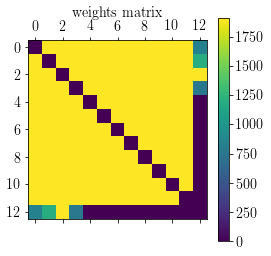

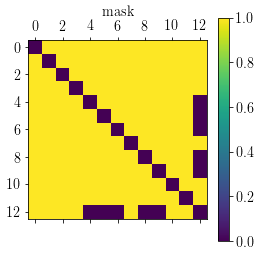

estimate using mds...
...done
estimate using weighted mds...
i 0
weighted mds: coordinate converged after 5 loops.
i 1
weighted mds: coordinate converged after 6 loops.
i 2
weighted mds: coordinate converged after 6 loops.
i 3
i 4
i 5
i 6
weighted mds: coordinate converged after 8 loops.
i 7
i 8
i 9
weighted mds: coordinate converged after 7 loops.
i 10
weighted mds: coordinate converged after 9 loops.
i 11
i 12
weighted mds: coordinate converged after 10 loops.
weighted mds: not yet converged: [  5.   6.   6.  10.  10.  10.   8.  10.  10.   7.   9.  10.  10.]
i 0
weighted mds: coordinate converged after 7 loops.
i 1
weighted mds: coordinate converged after 6 loops.
i 2
weighted mds: coordinate converged after 6 loops.
i 3
weighted mds: coordinate converged after 6 loops.
i 4
i 5
i 6
i 7
i 8
i 9
weighted mds: coordinate converged after 10 loops.
i 10
weighted mds: coordinate converged after 6 loops.
i 11
i 12
weighted mds: coordinate converged after 8 loops.
weighted mds: not yet conve

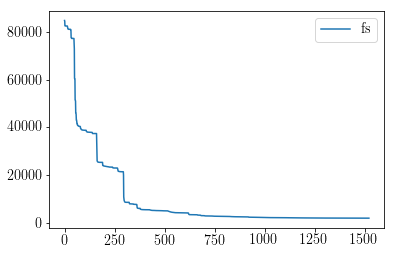

In [100]:
from point_configuration import HeterogenousConfiguration, PointConfiguration, dm_from_edm, create_from_points, edm_from_dm
from algorithms import reconstruct_mds, reconstruct_srls, reconstruct_weighted
from plots_cti import plot_matrix
    
points_mds = []
points_mds_weighted = []
points_srls = []
points_srls_weighted = []
points_original = []

#weight_method = 'bias'
weight_method = 'sigma'
#weight_method = 'LOESS'

printout=False
for result in results:
    N = result.edm_avg.shape[0]
    real_points = np.r_[anchors,result.real.reshape((1,-1))]
    porig = create_from_points(real_points, HeterogenousConfiguration)
    index = N-1
    other = np.delete(np.arange(N),index)
    
    edm = result.edm_avg
    pnoisy = porig.copy()
    pnoisy.edm[index,other] = edm[index,other]
    pnoisy.edm[other,index] = edm[other,index]
    weights_matrix = get_weights(weight_method)
    plot_matrix(weights_matrix, 'weights matrix')
    mask = (weights_matrix != 0)
    plot_matrix(mask, 'mask')
    
    print('estimate using mds...')
    Xmds = reconstruct_mds(pnoisy.edm, porig.points, False, 'geometric', mask=mask)
    print('...done')
    print('estimate using weighted mds...')
    #X_0 = porig.points
    X_0 = Xmds
    Xmds_weighted, fs, err_edms, err_points = reconstruct_weighted(pnoisy.edm, weights_matrix, X_0=X_0, X_hat=Xmds, points=porig.points, print_out=False)
    print('...done')
    print('estimate using SRLS...')
    Xsrls = reconstruct_srls(pnoisy.edm, porig.points, False, index=index, weights=mask)
    print('...done')
    print('estimate using weighted SRlS...')
    Xsrls_weighted = reconstruct_srls(pnoisy.edm, porig.points, False, weights=weights_matrix)
    print('...done')
    plt.plot(fs,label='fs')
    plt.legend(loc='best')
    plt.show()
    
    if (printout):
        plot_matrix(porig.edm, 'real EDM')
        plot_matrix(pnoisy.edm,'noisy EDM')
        plot_matrix(porig.edm-pnoisy.edm,'difference')
    
        pmds = create_from_points(Xmds, PointConfiguration)
        pmds_weighted = create_from_points(Xmds_weighted, PointConfiguration)
        psrls = create_from_points(Xsrls, PointConfiguration)
        psrls_weighted = create_from_points(Xsrls_weighted, PointConfiguration)
        print('Noisy edm error',np.linalg.norm(pnoisy.edm-porig.edm))
        print('SRLS edm error',np.linalg.norm(psrls.edm-porig.edm))
        print('MDS edm error ',np.linalg.norm(pmds.edm-porig.edm))
        plt.matshow(porig.edm-psrls.edm)
        plt.colorbar()
        plt.axis('off')
        plt.title('Diff SRLS {}'.format(i))
        plt.show()
        plt.matshow(porig.edm-pmds.edm)
        plt.colorbar()
        plt.axis('off')
        plt.title('Diff MDS {}'.format(i))
        plt.show()
    
    points_original.append(porig.points)
    points_mds.append(Xmds)
    points_mds_weighted.append(Xmds_weighted)
    points_srls.append(Xsrls)
    points_srls_weighted.append(Xsrls_weighted.copy())

## 2D Visualization

rmse mds 0.6794667702649777
rmse mds weighted 0.07910101020331976
rmse srls 0.33988000204069013
rmse srls weighted 0.37939325191002365


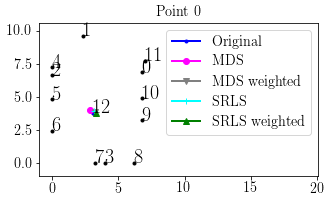

rmse mds 0.6704607288113814
rmse mds weighted 0.4308605453514765
rmse srls 1.567795992966538
rmse srls weighted 0.3086072061328608


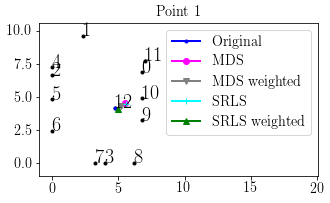

rmse mds 0.1543722144691918
rmse mds weighted 0.47802391615192746
rmse srls 0.11163087520239094
rmse srls weighted 0.8408412323601313


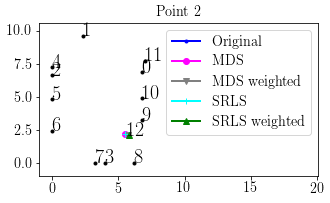

rmse mds 0.27574338769037265
rmse mds weighted 0.17491507009968288
rmse srls 1.3881802149463855
rmse srls weighted 0.19871531684443253


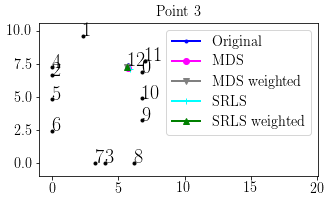

rmse mds 0.24448527775670206
rmse mds weighted 0.22105356840274368
rmse srls 0.23813870799809042
rmse srls weighted 0.2842496907436359


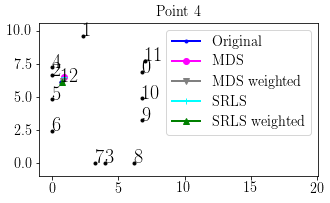

In [103]:
from plots_cti import plot_point_sets
from basics import rmse

n_methods = 4
names=['Original','MDS','MDS weighted','SRLS','SRLS weighted']
rmses = np.zeros((n_methods, N_POSITIONS))
size = [5,5]
for i in range(N_POSITIONS):
    Xorig = points_original[i]
    Xmds = points_mds[i]
    Xmds_weighted = points_mds_weighted[i]
    Xsrls = points_srls[i]
    Xsrls_weighted = points_srls_weighted[i]
    rmse_mds = rmse(Xmds[-1,:], Xorig[-1,:])
    rmse_srls = rmse(Xsrls[-1,:], Xorig[-1,:])
    rmse_srls_weighted = rmse(Xsrls_weighted[-1,:], Xorig[-1,:])
    rmse_mds_weighted = rmse(Xmds_weighted[-1,:], Xorig[-1,:])
    
    rmses[:,i] = [rmse_mds, rmse_mds_weighted, rmse_srls, rmse_srls_weighted]
    print('rmse mds', rmse_mds)
    print('rmse mds weighted', rmse_mds_weighted)
    print('rmse srls', rmse_srls)
    print('rmse srls weighted', rmse_srls_weighted)
    
    plot_point_sets([Xorig,Xmds,Xmds_weighted,Xsrls,Xsrls_weighted],'Point {}'.format(i),size=size,names=names)
    #plot_points(Xsrls, title='SRLS, rmse={:2.2e}'.format(rmse_slrs), size=size)
    #plot_points(Xmds, title='MDS, rmse={:2.2e}'.format(rmse_mds),size=size)

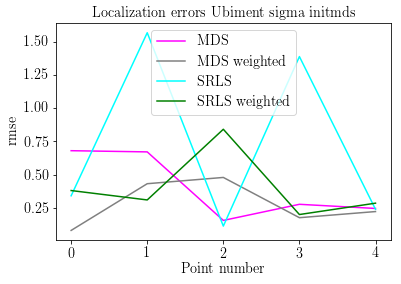

In [104]:
from plots_cti import COLORS
for i,method in enumerate(rmses):
    plt.plot(method,label=names[i+1],color=COLORS[i+2])
plt.legend(loc='best')
plt.xlabel('Point number')
plt.ylabel('rmse')
plt.title('Localization errors {} {} initmds'.format(tool,weight_method))
plt.savefig('results/rmse_{}_{}_initmds.png'.format(tool,weight_method))
plt.show()

## 3D Visualization

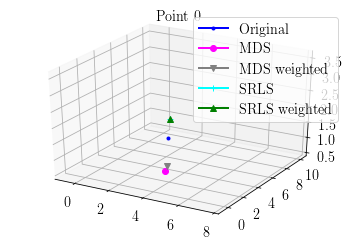

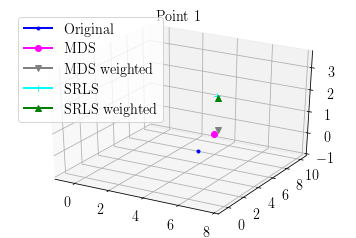

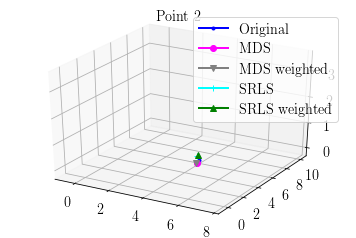

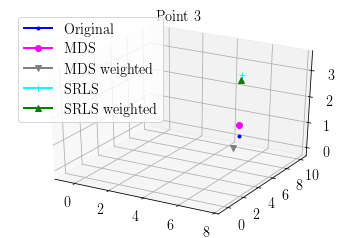

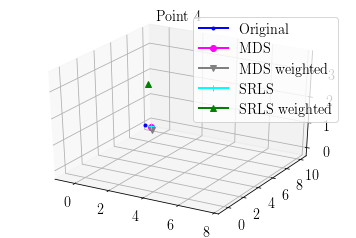

In [99]:
from plots_cti import plot_point_sets_3d

for i in range(N_POSITIONS):
    Xorig = points_original[i]
    Xmds = points_mds[i]
    Xsrls = points_srls[i]
    Xmds_weighted = points_mds_weighted[i]
    Xsrls_weighted = points_srls_weighted[i]
    plot_points = [Xorig, Xmds, Xmds_weighted, Xsrls, Xsrls_weighted]
    plot_point_sets_3d(plot_points, names, 'Point {}'.format(i))

In [90]:
real_points

array([[ 6.8 , -2.74,  1.96],
       [ 2.28,  0.  ,  2.01],
       [ 0.  , -2.98,  2.48],
       [ 3.97, -9.6 ,  2.06],
       [ 0.68, -3.46,  1.07]])